In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	


## 1.2 Driven scenario

# 1. limit $\gamma \tau << 1 $

##  Single excitation , $\phi = 0,2\pi $ 

In [92]:
#  parameter definition, resonant condition 

gamma = 0.8
tau = 0.15 
phi = 2*np.pi 
t_max = 100*tau
dt = tau/50
w_ref = np.sqrt(gamma/tau)

In [93]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,100)

In [94]:
om_emitter = phi/tau
g=np.sqrt(gamma/tau)
exact = Driven_cavity_class(om_emitter,om_emitter,om_emitter,0,g)
pe,_=exact.evolve(t)

In [ ]:
exact_2=two_modes_cavity(om_emitter,om_emitter,1.5*om_emitter,g,g,0,om_emitter,3) # revelacion divina aqui, no se por que puse 1.5 
pe2,_,_=exact_2.evolve(t)

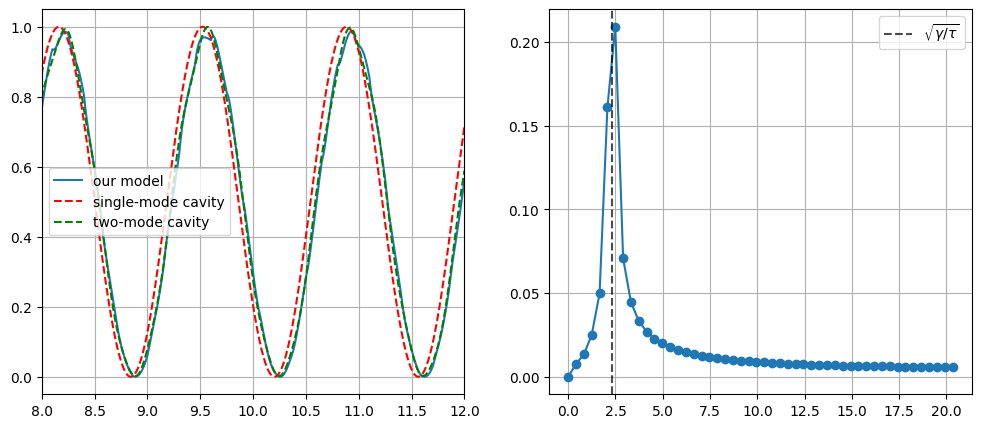

In [125]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model ')
axs[0].plot(t,pe,'r--',label='single-mode cavity')
axs[0].plot(t,pe2,'g--',label='two-mode cavity')
axs[0].legend()
axs[0].set_xlim(8,12)
axs[0].grid()

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7,label =r'$ \sqrt{\gamma/\tau} $')
axs[1].legend()
axs[1].grid()

plt.show()

Single mode cavity fits very well, but two-mode cavity with the second cavity off resonant $\omega_{c} = 1.5\omega_{e}$ fits even better. 

## Single excitation, $\phi = \pi$ 


In [75]:
#  parameter definition, off-resonant 

gamma = 0.8
tau = 0.2 
phi = np.pi 
t_max = 100*tau
dt = tau/50
w_ref = np.sqrt(np.pi**2+2*gamma*tau)/tau

In [69]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,200)

In [70]:
om_emitter = phi/tau
delta=np.pi/(tau)
g=np.sqrt(gamma/tau)
exact=two_modes_cavity(om_emitter,om_emitter+delta,om_emitter-delta,g,g,0,om_emitter,3)
pe,_,_=exact.evolve(t)


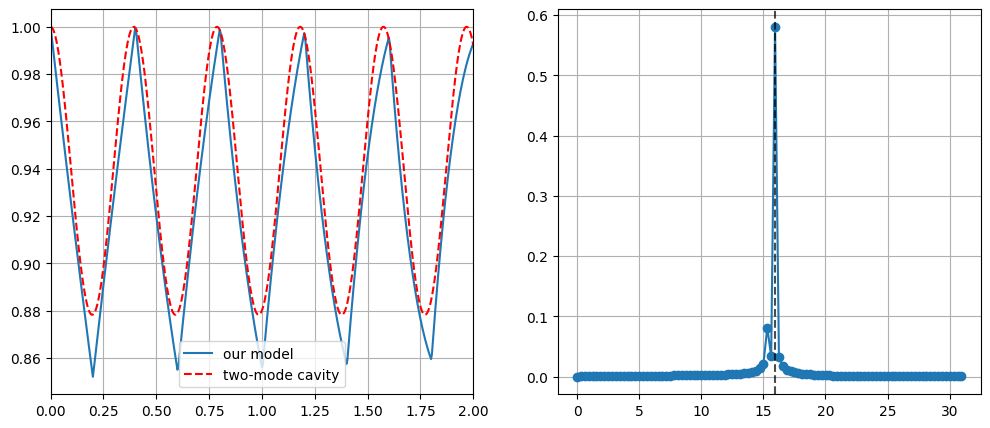

In [76]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model')
axs[0].plot(t,pe,'r--',label='two-mode cavity')
#axs[0].plot(t,0.87+0.13*np.cos(w_ref/2*t)**2)
axs[0].grid()
axs[0].legend()
axs[0].set_xlim(0,2)

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7)
axs[1].grid()
#axs[1].set_xlim(25,50)

plt.show()

It now seems like 

$$ \Omega_{eff} = \frac{\sqrt{\pi^{2}+2\gamma \tau}}{\tau} $$

This reinforces the idea that the effective coupling is $g = \sqrt{\frac{\gamma}{\tau}}$. Now I need to now how to estimate the frequencies of the modes as a function of $ (\phi, \gamma, \tau)$ 


## Single excitation, general case 

In [127]:
#  parameter definition, resonant condition 

gamma = 1
tau = 0.15 
phi = 2*np.pi  
t_max = 100*tau
dt = tau/50

DELTA = 0.5 


w_ref = np.sqrt(gamma/tau)

In [133]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,200)

In [128]:
om_emitter = phi/tau
delta=np.pi/(tau)*np.sin(phi)
g=np.sqrt(gamma/tau)
exact=two_modes_cavity(om_emitter,om_emitter,1.5*om_emitter,g,g,0,om_emitter,3)
pe,_,_=exact.evolve(t)

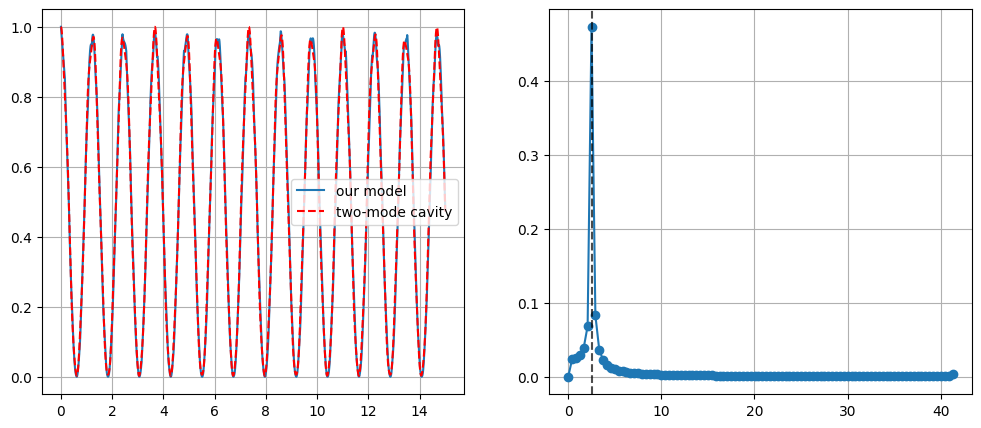

In [134]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model')
axs[0].plot(t,pe,'r--',label='two-mode cavity')
#axs[0].plot(t,0.87+0.13*np.cos(w_ref/2*t)**2)
axs[0].grid()
axs[0].legend()

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7)
axs[1].grid()
#axs[1].set_xlim(25,50)

plt.show()

# Driven scenario $\Omega \neq 0 $ 

In [68]:
cavity = new_cav_model(gamma,phi,tau,Omega)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([0,1])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,100)
w2,u2 = fast_f_t(t,e,100)
w_new = w2[np.argmax(u2)]

In [64]:
exact = Driven_cavity_class(phi/tau,phi/tau,phi/tau,Omega,np.sqrt(gamma/tau),20,start_ground=True)
pe,exc = exact.evolve(t)

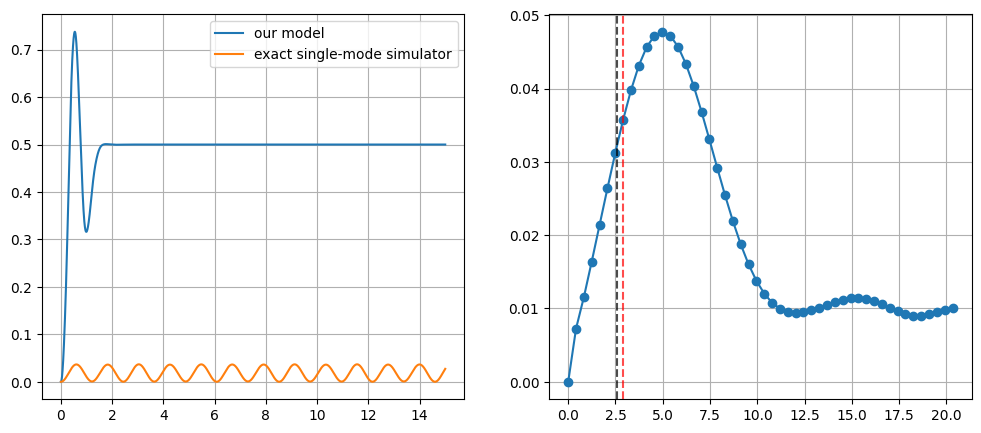

In [69]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model')
axs[0].plot(t,pe,label='exact single-mode simulator')
axs[0].legend()
axs[0].grid()

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7)
axs[1].axvline(w_new/2,linestyle = '--',color='r',alpha=0.7)
axs[1].grid()

plt.show()

No se como interpretar esto. Con driving debil, los dos hacen lo mismo. Con driving fuerte no. Pienso que es raoznable 